In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the covid19 csv file and converting to dataframe: df
df = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')

In [5]:
# Looking at the first five rows of the dataframe
df.head()

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
0,Lincoln County,55069,Wisconsin,27593.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium,8/18/2022
1,Manitowoc County,55071,Wisconsin,78981.0,355,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low,8/18/2022
2,Marathon County,55073,Wisconsin,135692.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,209.30,High,8/18/2022
3,Monroe County,55081,Wisconsin,46253.0,290,"La Crosse (La Crosse), WI - Monroe, WI",257027.0,3.9,15.6,216.20,High,8/18/2022
4,Portage County,55097,Wisconsin,70772.0,400,"Portage, WI",70772.0,5.9,7.1,217.60,Medium,8/18/2022


In [6]:
# Converting 'date_updated' column to datetime format
df['date_updated'] = pd.to_datetime(df['date_updated'])
df.head(2)

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
0,Lincoln County,55069,Wisconsin,27593.0,282,"Marathon (Wausau), WI - Wood, WI",291401.0,4.7,13.4,177.58,Medium,2022-08-18
1,Manitowoc County,55071,Wisconsin,78981.0,355,"Sheboygan (Sheboygan), WI - Manitowoc, WI",244410.0,3.4,9.8,169.66,Low,2022-08-18


In [7]:
# Preprocessing steps
# Drop rows with null values
df = df.dropna()

In [8]:
temp=df['date_updated'].dt.to_period('M')
temp.head()

0    2022-08
1    2022-08
2    2022-08
3    2022-08
4    2022-08
Name: date_updated, dtype: period[M]

In [9]:
# Finding unique months
unique_months = df['date_updated'].dt.to_period('M').unique()

# Count the number of unique months
num_months = len(unique_months)

print("Number of months in the dataset:", num_months)

Number of months in the dataset: 9


In [10]:
# Group by state and month
#By grouping the data by both the state and the month, we create subsets of the DataFrame
#where each subset corresponds to a combination of a state and a month.
state_month_df = df.groupby(['state', df['date_updated'].dt.to_period('M')])

In [11]:
# Using the grouped dataframe, calculating median Covid cases per 100k population
state_monthly_median = state_month_df['covid_cases_per_100k'].median()

In [12]:
state_monthly_median

state    date_updated
Alabama  2022-02         149.620
         2022-03          41.780
         2022-04          18.220
         2022-05          32.235
         2022-06         145.250
                          ...   
Wyoming  2022-06         165.780
         2022-07         214.295
         2022-08         149.795
         2022-09          78.780
         2022-10          65.110
Name: covid_cases_per_100k, Length: 498, dtype: float64

Finding State with lowest Median Covid cases. The purpose of using median is because it is less sensitive to outliers compared to the mean.

In [13]:
# Calculate median of median values for each state
state_median_over_time = state_monthly_median.groupby('state').median()

# Find the state with the lowest median value
lowest_median_state = state_median_over_time.idxmin()

# Find the actual median value for the lowest median state
lowest_median_value = state_median_over_time.loc[lowest_median_state]

print("State with the lowest Median Covid cases per 100k Population Over Time:", lowest_median_state)
print("Median COVID Cases per 100k Population for the Lowest Median State:", lowest_median_value)

State with the lowest Median Covid cases per 100k Population Over Time: Nevada
Median COVID Cases per 100k Population for the Lowest Median State: 38.42


Therefore, Nevada is the state with the lowest (median) covid cases over the entire duration.

Finding county within Nevada with the Lowest Median over 9 months

In [14]:
# Filter data for Nevada
df_nv = df[df['state'] == 'Nevada']

# Group by county and calculate the median Covid cases per 100k population
county_median_cases = df_nv.groupby('county')['covid_cases_per_100k'].median()

# Find the county with the lowest median value
lowest_median_county = county_median_cases.idxmin()

# Find the median value for the lowest median county
lowest_median_value = county_median_cases.min()

print("County in Nevada with the lowest median covid cases per 100k Population:", lowest_median_county)
print("Value of the lowest median Covid cases per 100k Population: ", lowest_median_value)

County in Nevada with the lowest median covid cases per 100k Population: Esmeralda County
Value of the lowest median Covid cases per 100k Population:  0.0


Finding county within Nevada with the Highest Median over 9 months

In [15]:
# Find the county with the highest median value
highest_median_county = county_median_cases.idxmax()

# Find the median value for the highest median county
highest_median_value = county_median_cases.max()

print("County in Nevada with the highest Median covid Cases per 100k Population:", highest_median_county)
print("Value of the highest median Covid cases per 100k Population", highest_median_value)

County in Nevada with the highest Median covid Cases per 100k Population: Washoe County
Value of the highest median Covid cases per 100k Population 105.83


Plotting Admissions vs Bed Utilization scatter plot and 3 Covid progression metrics month to month

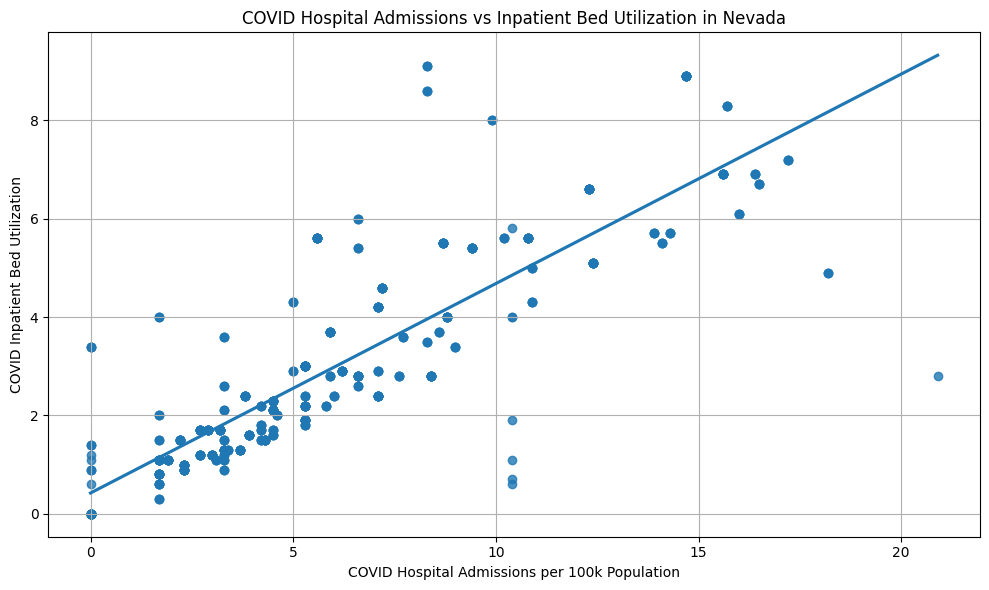

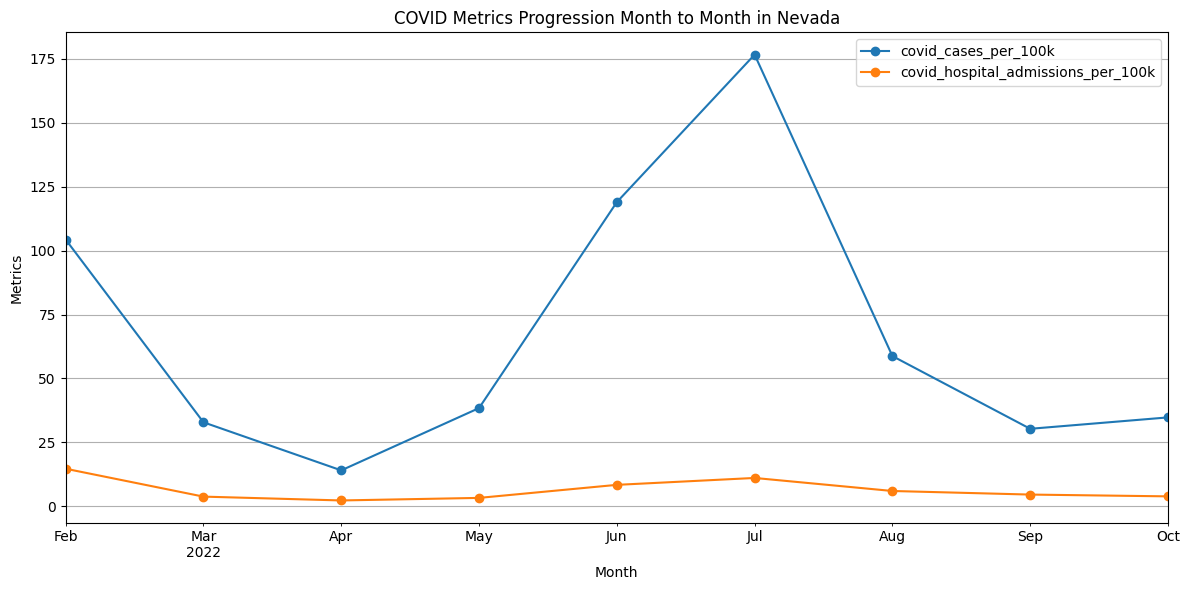

In [16]:
# Filter data for Nevada
df_nv = df[df['state'] == 'Nevada']
#print(df_nv.head())

# Admissions vs Bed Utilization Overall in Nevada with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='covid_hospital_admissions_per_100k', y='covid_inpatient_bed_utilization', data=df_nv, ci=None)
plt.title('COVID Hospital Admissions vs Inpatient Bed Utilization in Nevada')
plt.xlabel('COVID Hospital Admissions per 100k Population')
plt.ylabel('COVID Inpatient Bed Utilization')
plt.grid(True)
plt.tight_layout()
plt.show()

# Progression Month to Month in Nevada
# Group by month and calculate aggregate metrics using median
NV_monthly_stats = df_nv.groupby(df_nv['date_updated'].dt.to_period('M')).agg({
    'covid_cases_per_100k': 'median',
    'covid_hospital_admissions_per_100k': 'median',
})

# Plot metrics over time
plt.figure(figsize=(12, 6))
NV_monthly_stats.plot(marker='o', ax=plt.gca())
plt.title('COVID Metrics Progression Month to Month in Nevada')
plt.xlabel('Month')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


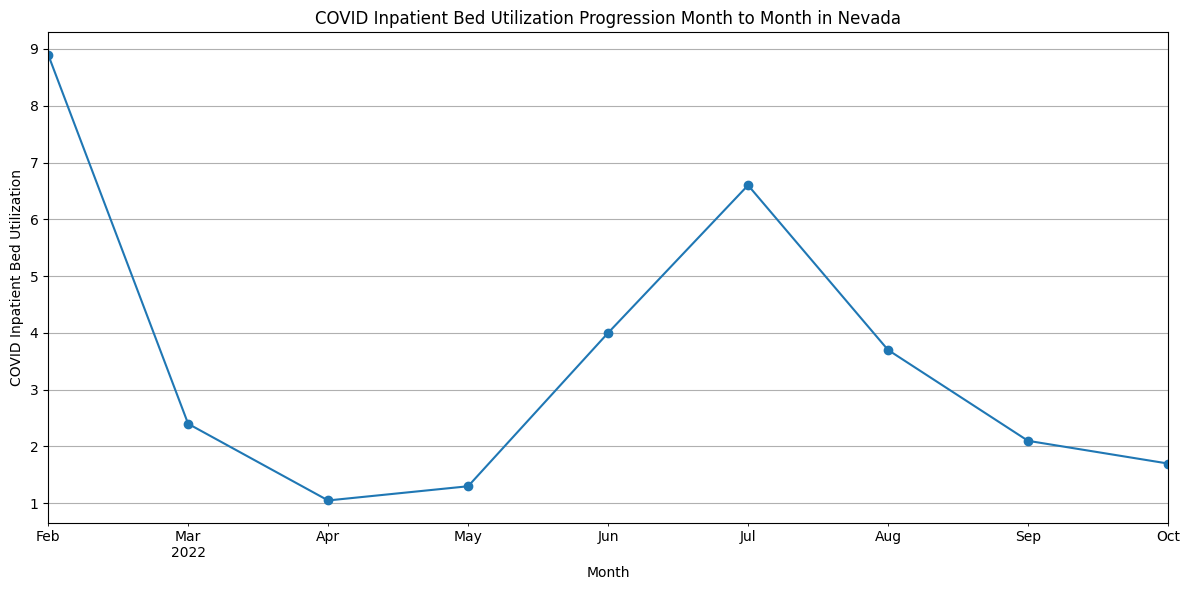

In [17]:
# 4. Inpatient Bed Utilization Progression Month to Month in Nevada
inpatient_bed_nv = df_nv.groupby(df_nv['date_updated'].dt.to_period('M')).agg({
    'covid_inpatient_bed_utilization': 'median'
})

# Plot COVID inpatient bed utilization over time
plt.figure(figsize=(12, 6))
inpatient_bed_nv['covid_inpatient_bed_utilization'].plot(marker='o')
plt.title('COVID Inpatient Bed Utilization Progression Month to Month in Nevada')
plt.xlabel('Month')
plt.ylabel('COVID Inpatient Bed Utilization')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Covid Cases month to month in Lincoln County (Lowest Median) and Esmeralda County (Highest Median)

In [18]:
# Filter data for Lincoln County and Esmeralda County
lincoln_county_data = df[(df['state'] == 'Nevada') & (df['county'] == 'Lincoln County')]
esmeralda_county_data = df[(df['state'] == 'Nevada') & (df['county'] == 'Esmeralda County')]

print(lincoln_county_data.head(2))

              county  county_fips   state  county_population  \
481   Lincoln County        32017  Nevada             5183.0   
5332  Lincoln County        32017  Nevada             5183.0   

      health_service_area_number                     health_service_area  \
481                          707  Clark (Las Vegas), NV - Washington, UT   
5332                         707  Clark (Las Vegas), NV - Washington, UT   

      health_service_area_population  covid_inpatient_bed_utilization  \
481                        2511266.0                              2.9   
5332                       2511266.0                              3.7   

      covid_hospital_admissions_per_100k  covid_cases_per_100k  \
481                                  7.1                  0.00   
5332                                 8.6                 19.29   

     covid-19_community_level date_updated  
481                       Low   2022-08-18  
5332                      Low   2022-08-11  


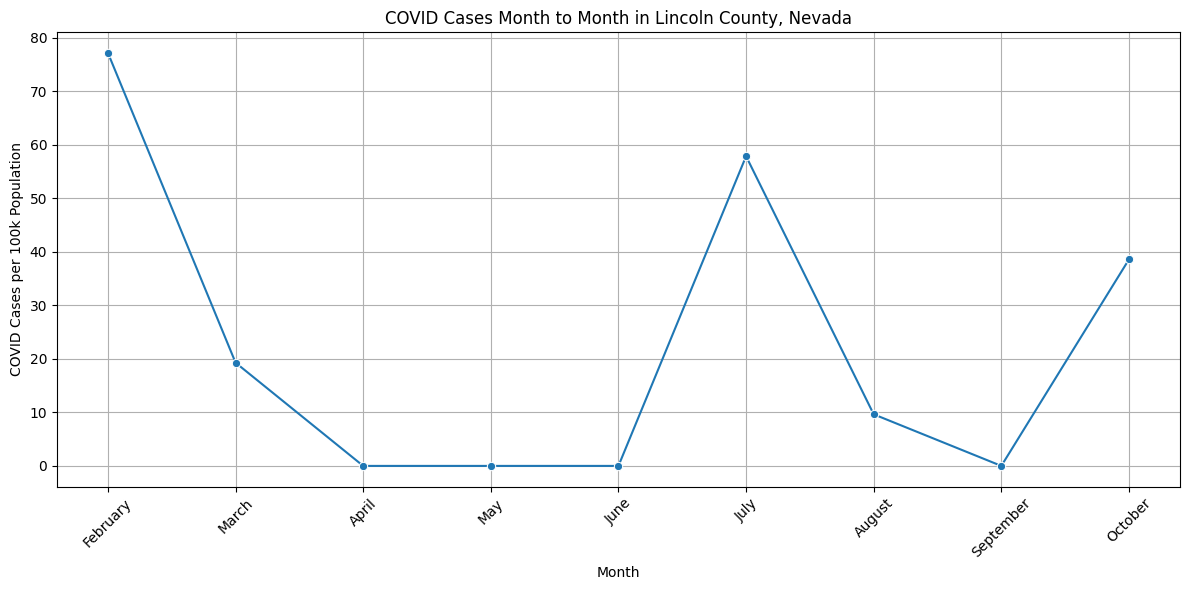

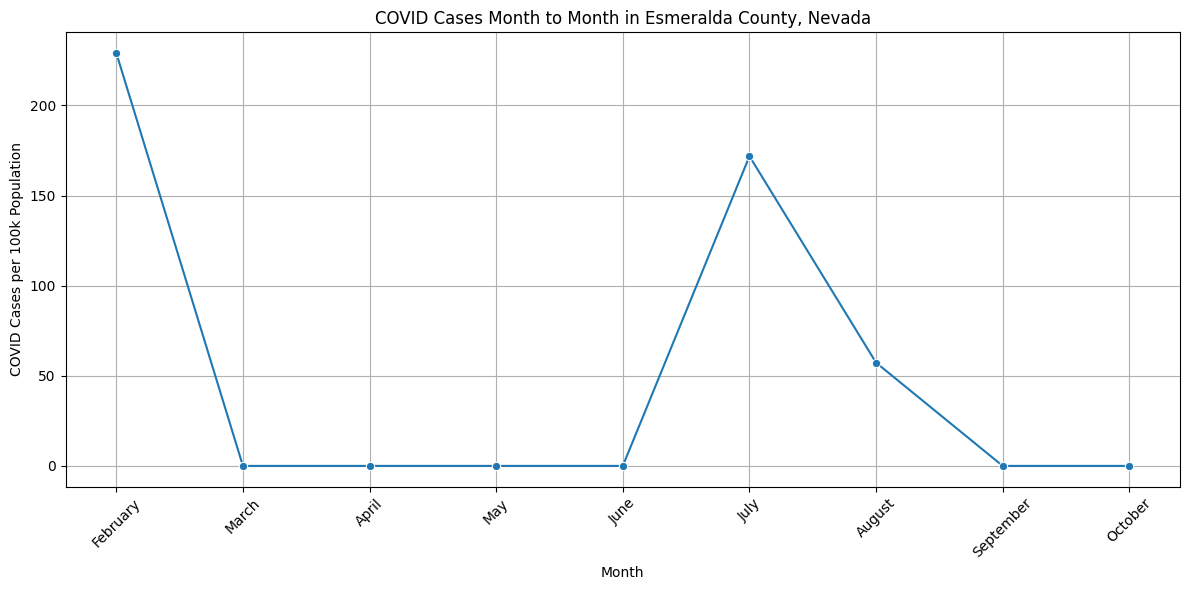

In [19]:
# Grouping by month and calculate aggregate metrics using median for Lincoln County
lincoln_monthly_stats = lincoln_county_data.groupby(lincoln_county_data['date_updated'].dt.to_period('M')).agg({
    'covid_cases_per_100k': 'median'
})

# Group by month and calculate aggregate metrics using median for Esmeralda County
esmeralda_monthly_stats = esmeralda_county_data.groupby(esmeralda_county_data['date_updated'].dt.to_period('M')).agg({
    'covid_cases_per_100k': 'median'
})

# Convert month index to month names
lincoln_monthly_stats.index = lincoln_monthly_stats.index.strftime('%B')
esmeralda_monthly_stats.index = esmeralda_monthly_stats.index.strftime('%B')

# Plot COVID cases month to month for Lincoln County
plt.figure(figsize=(12, 6))
sns.lineplot(x=lincoln_monthly_stats.index, y='covid_cases_per_100k', data=lincoln_monthly_stats, marker='o')
plt.title('COVID Cases Month to Month in Lincoln County, Nevada')
plt.xlabel('Month')
plt.ylabel('COVID Cases per 100k Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot COVID cases month to month for Esmeralda County
plt.figure(figsize=(12, 6))
sns.lineplot(x=esmeralda_monthly_stats.index, y='covid_cases_per_100k', data=esmeralda_monthly_stats, marker='o')
plt.title('COVID Cases Month to Month in Esmeralda County, Nevada')
plt.xlabel('Month')
plt.ylabel('COVID Cases per 100k Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Calculate median population for each county
esmeralda_median_population = esmeralda_county_data['county_population'].median()
lincoln_median_population = lincoln_county_data['county_population'].median()

print("Median population of Esmeralda County:", esmeralda_median_population)
print("Median population of Lincoln County:", lincoln_median_population)

Median population of Esmeralda County: 873.0
Median population of Lincoln County: 5183.0


Some Extra Graphs concerning each of the 9 months

COVID Cases per 100k Population in Nevada's counties for each of the 9 months:

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


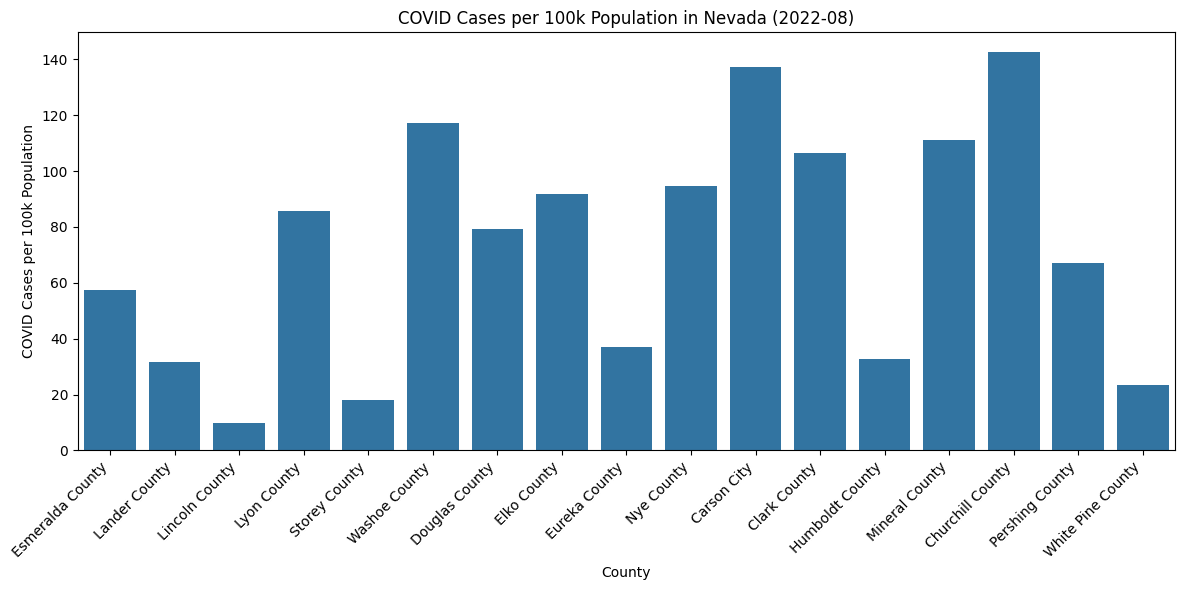

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


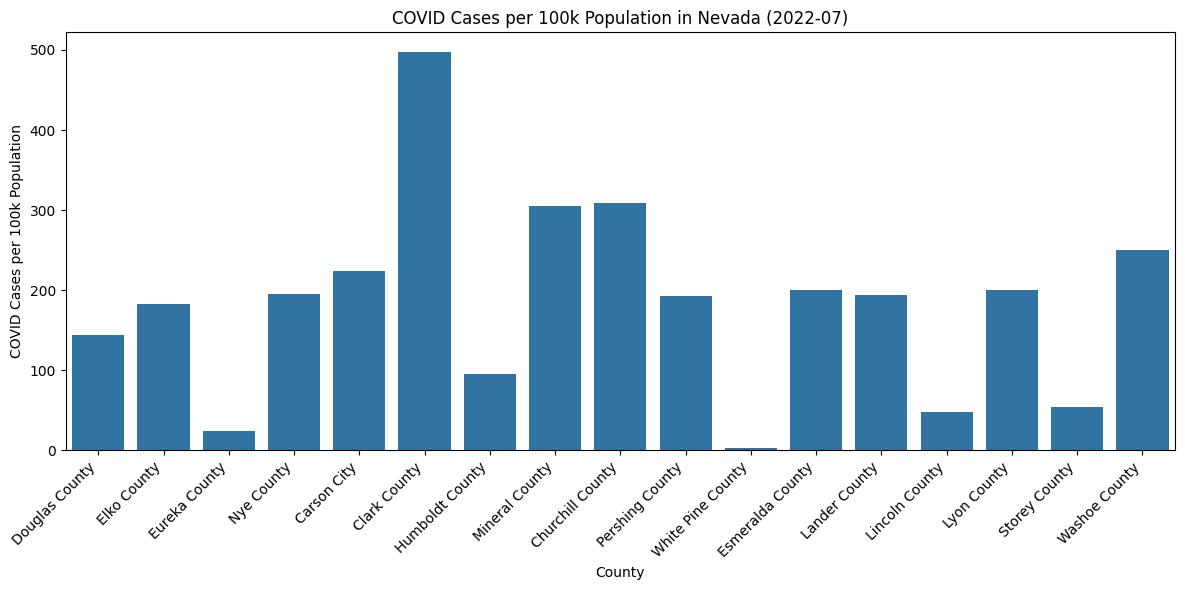

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


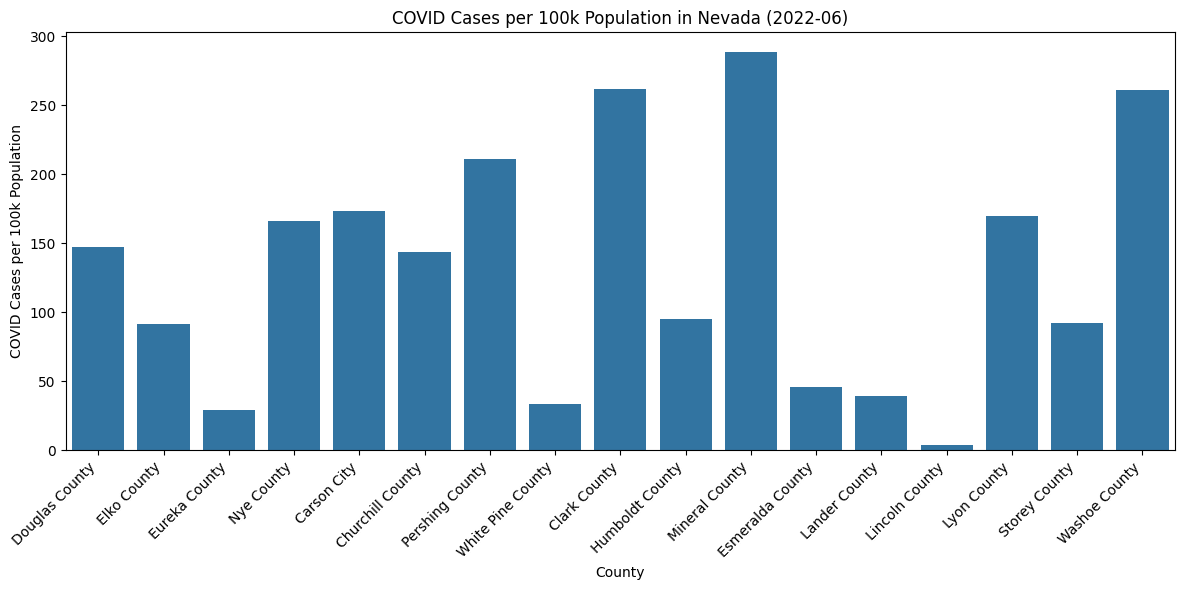

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


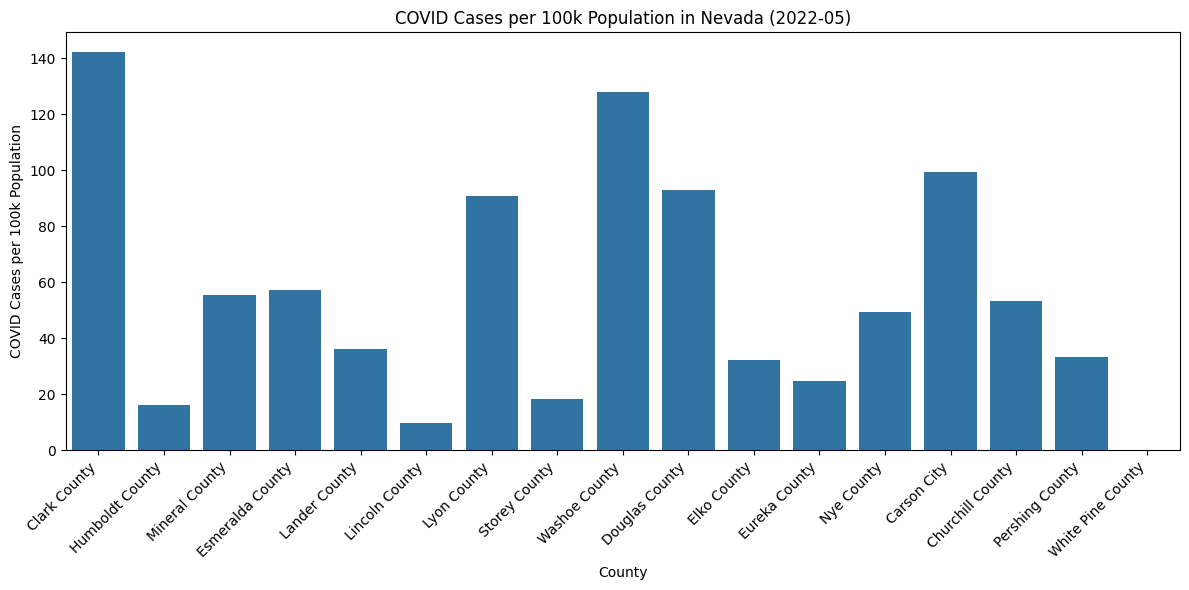

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


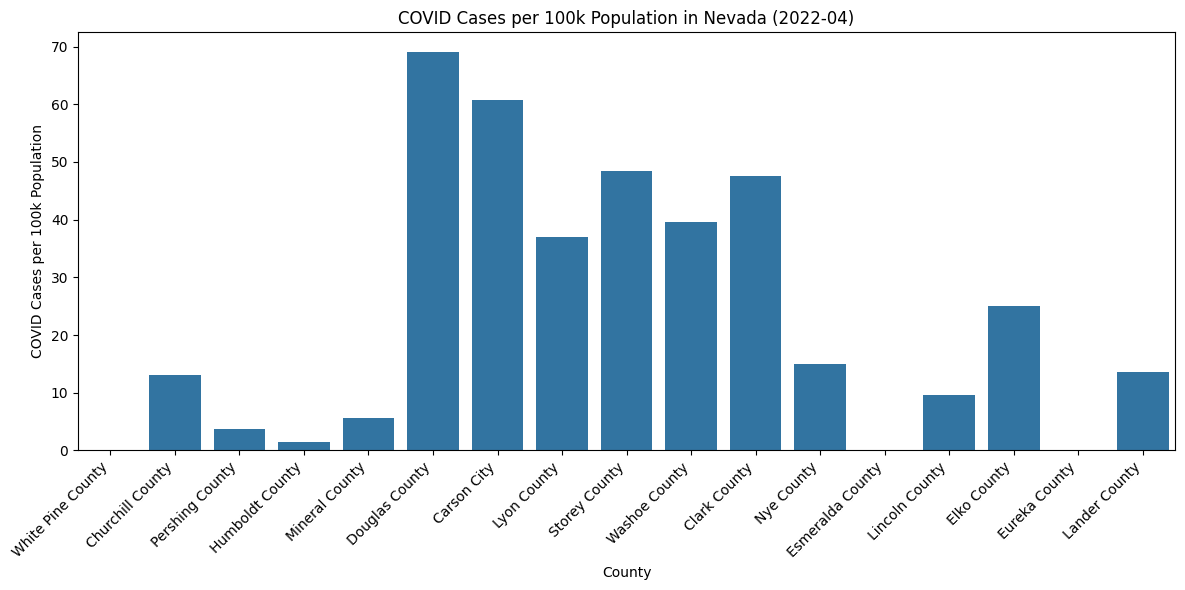

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


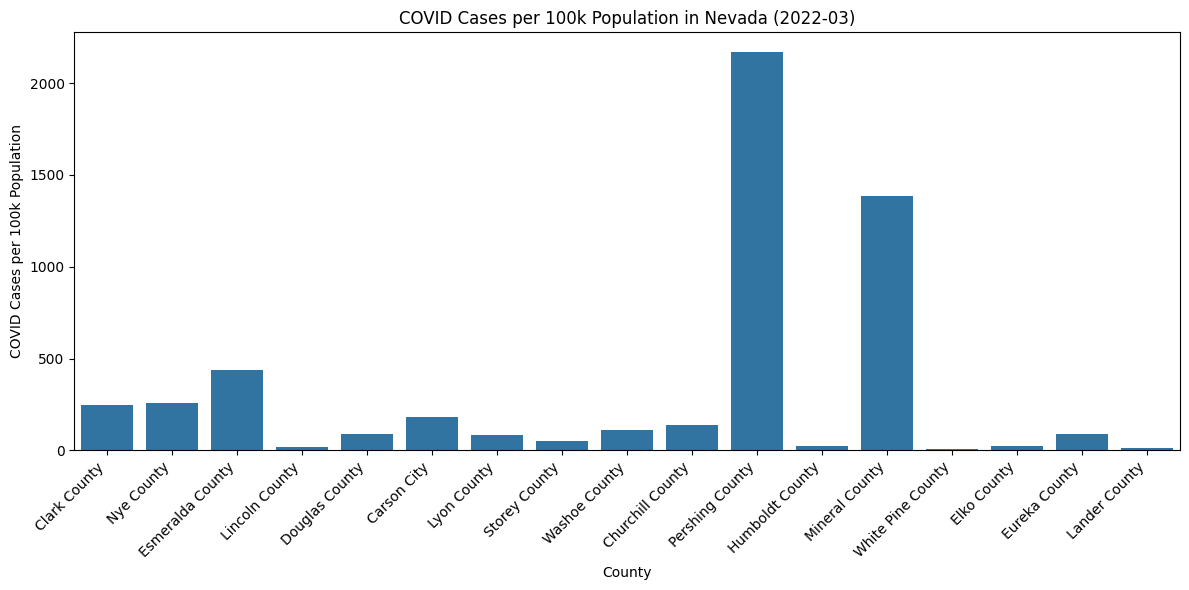

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


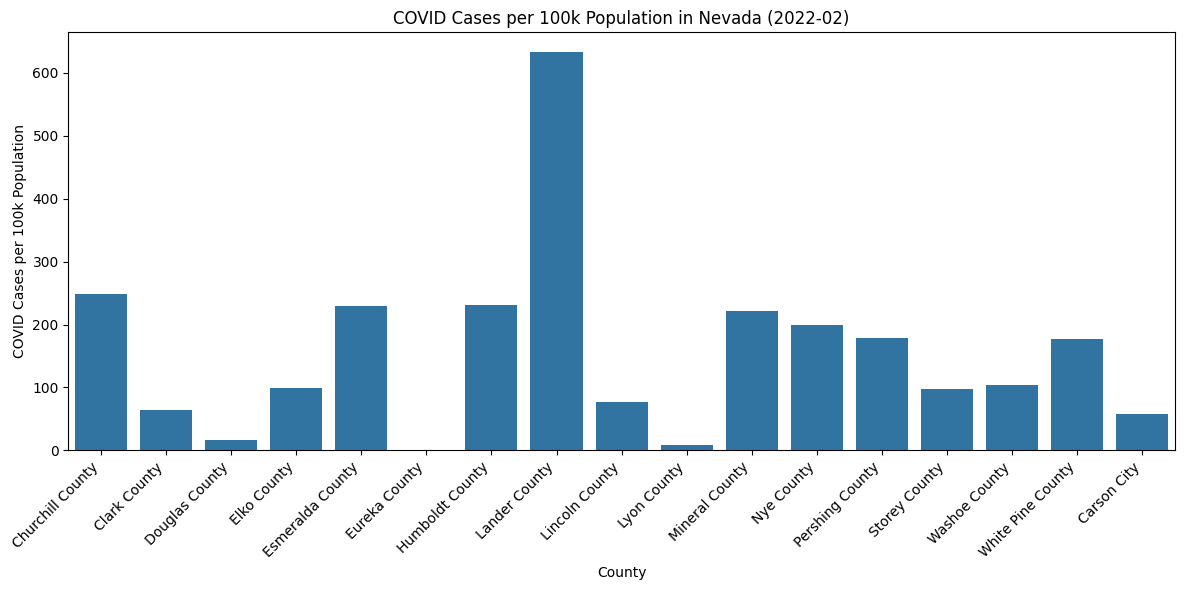

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


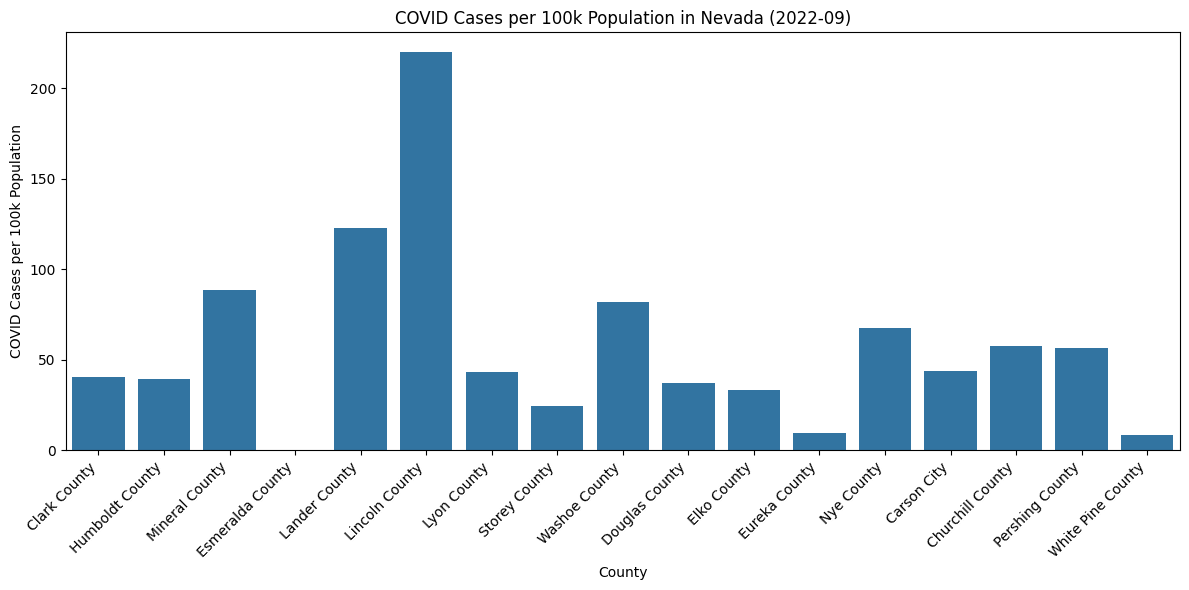

<ipython-input-20-8891423c24a3>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)


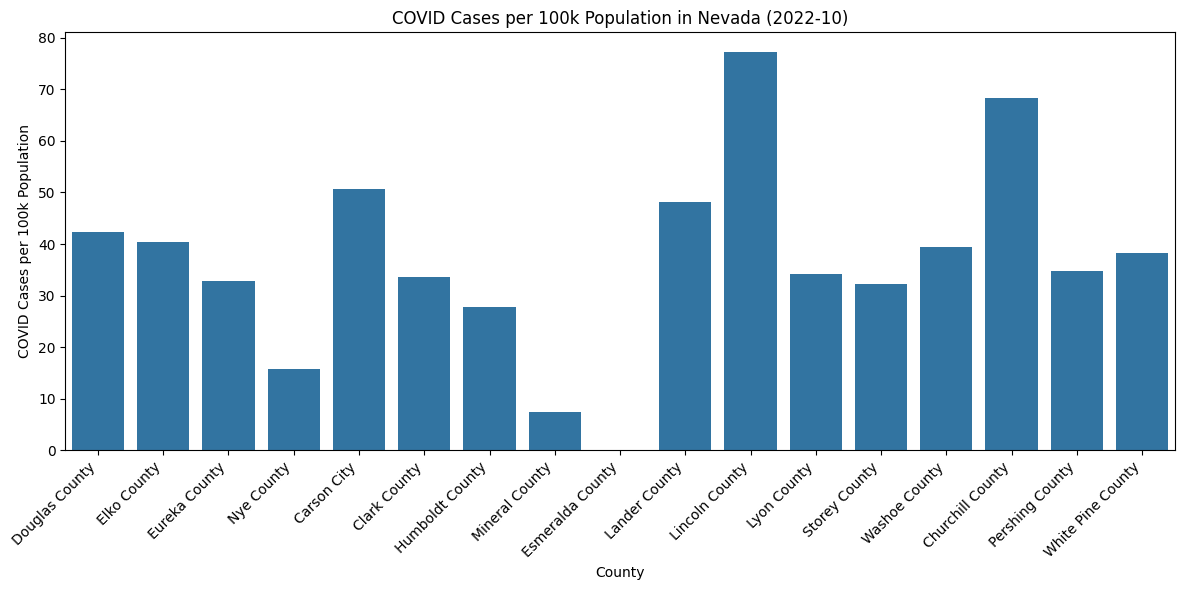

In [20]:
# Extracting unique months
unique_months = df_nv['date_updated'].dt.to_period('M').unique()

# Iterating over each unique month
for month in unique_months: #9 months
    # Filter data for the current month
    df_month = df_nv[df_nv['date_updated'].dt.to_period('M') == month]

    # Plot bar chart for current month without confidence interval lines
    plt.figure(figsize=(12, 6))
    sns.barplot(x='county', y='covid_cases_per_100k', data=df_month, ci=None)
    plt.title(f'COVID Cases per 100k Population in Nevada ({month})')
    plt.xlabel('County')
    plt.ylabel('COVID Cases per 100k Population')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


COVID Hospital Admissions per 100k Population in Nevada's counties for each of the 9 months:

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


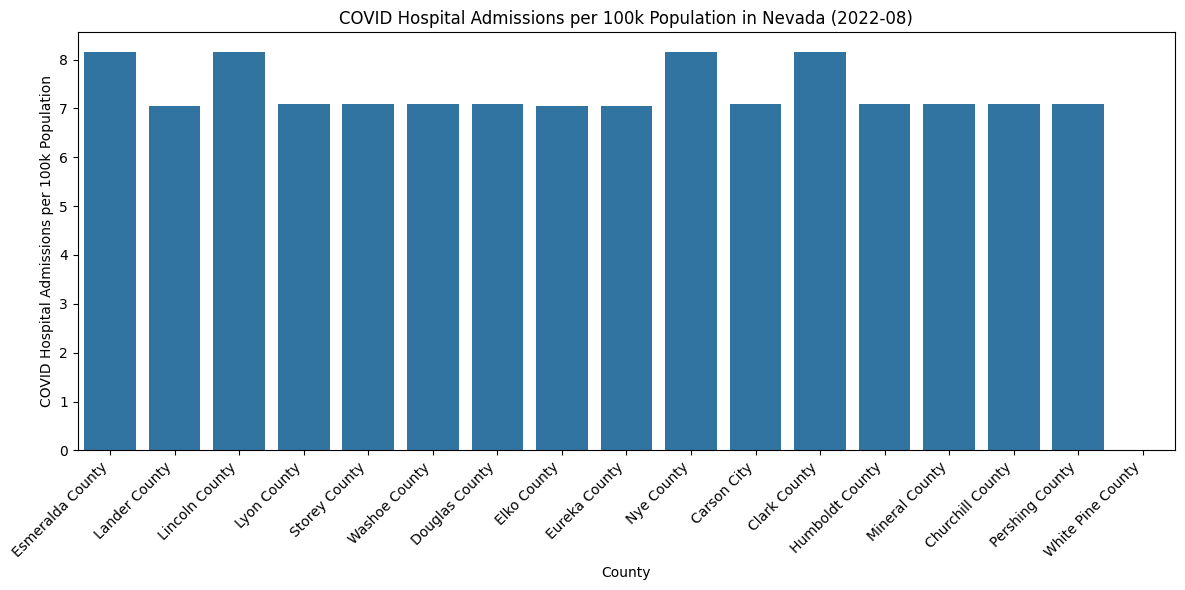

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


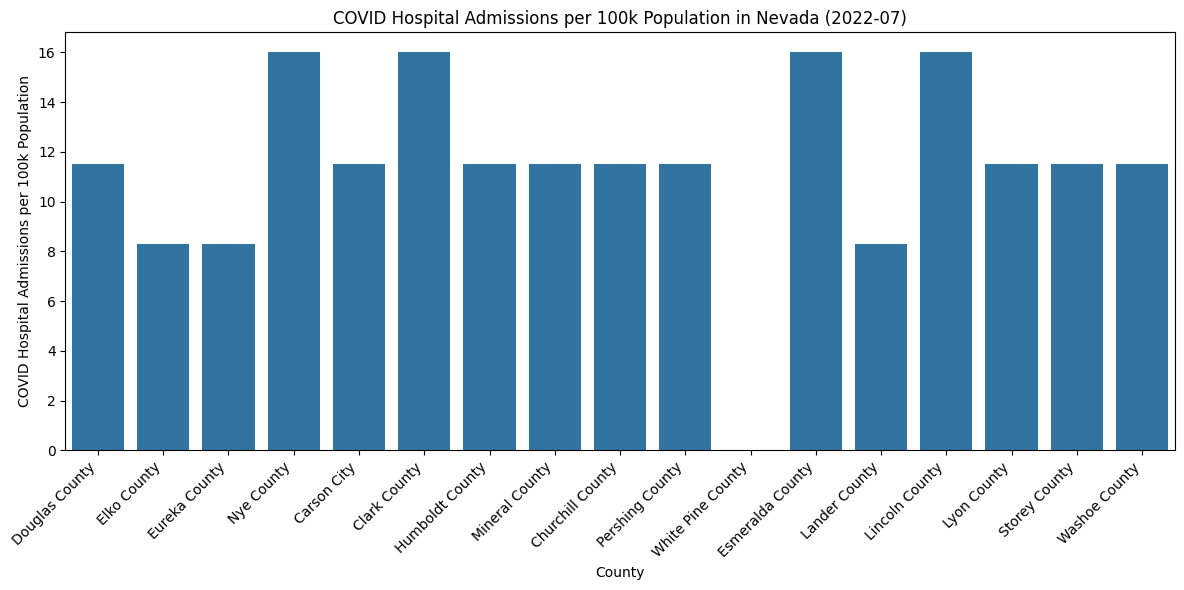

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


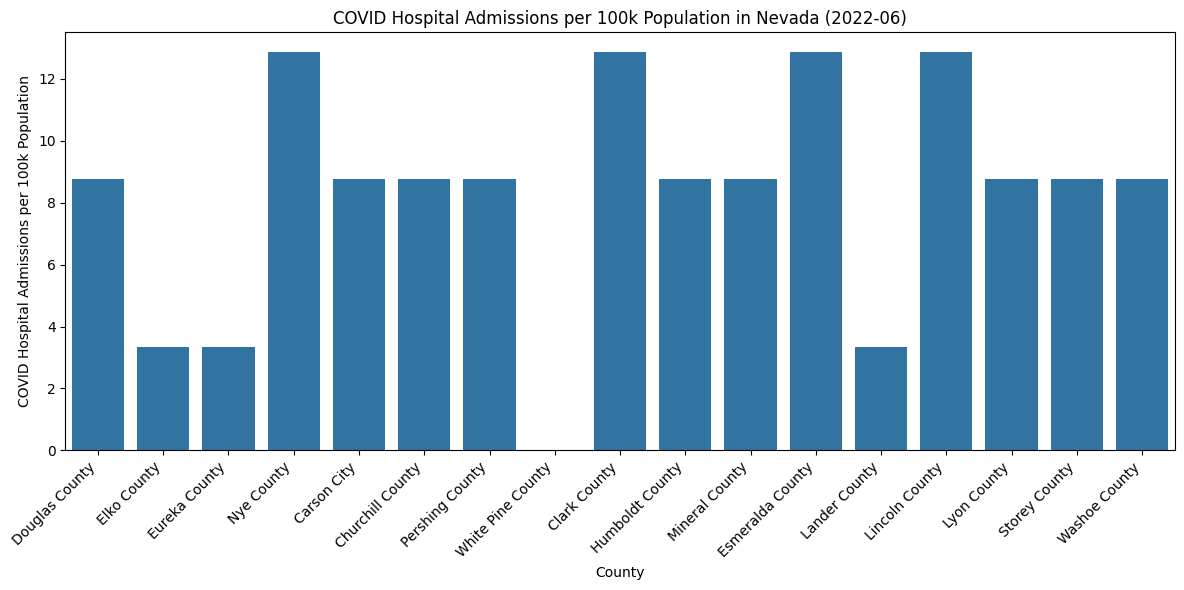

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


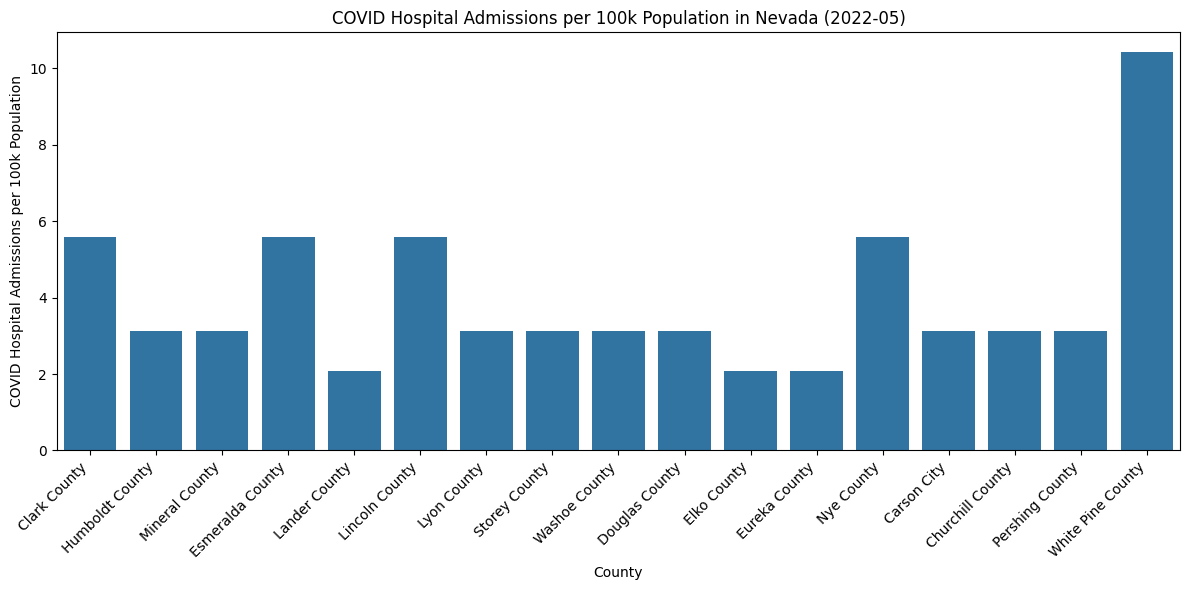

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


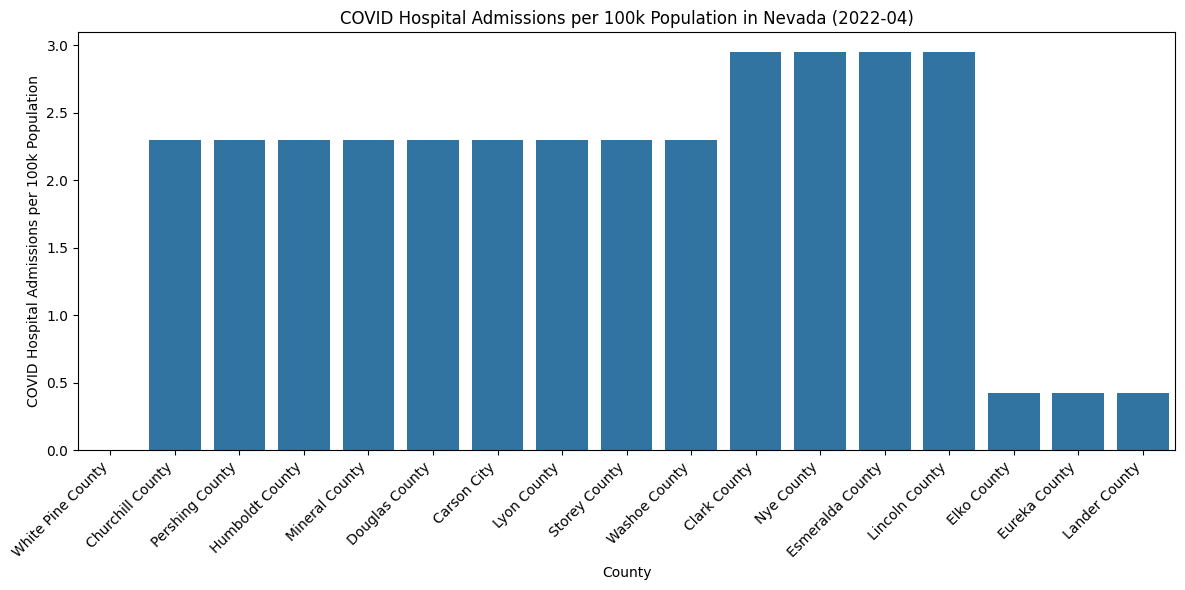

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


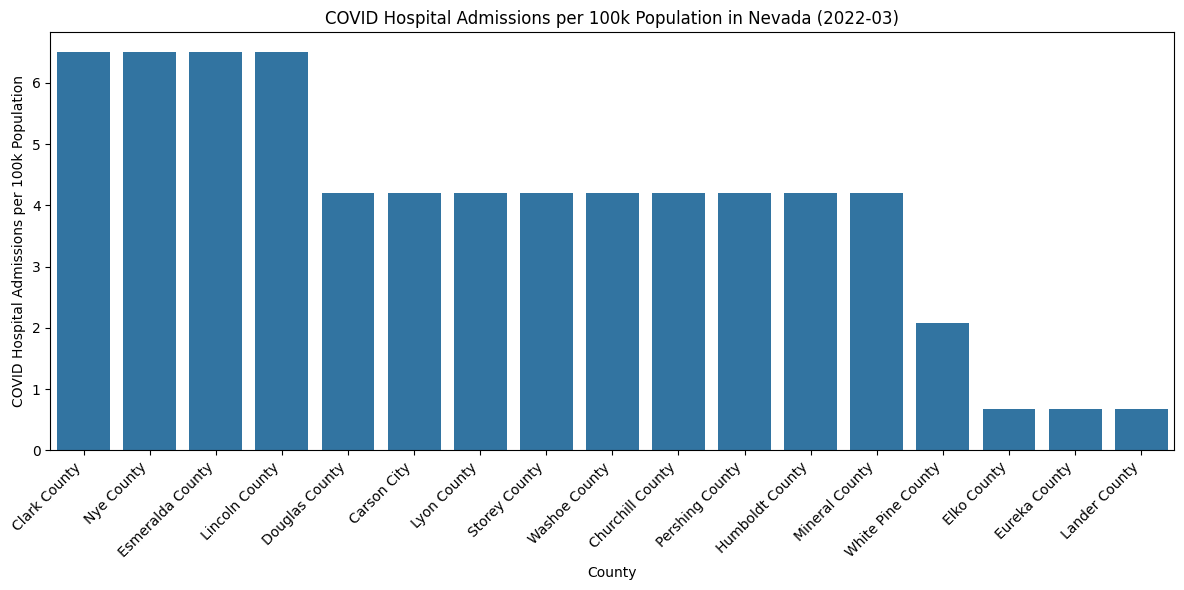

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


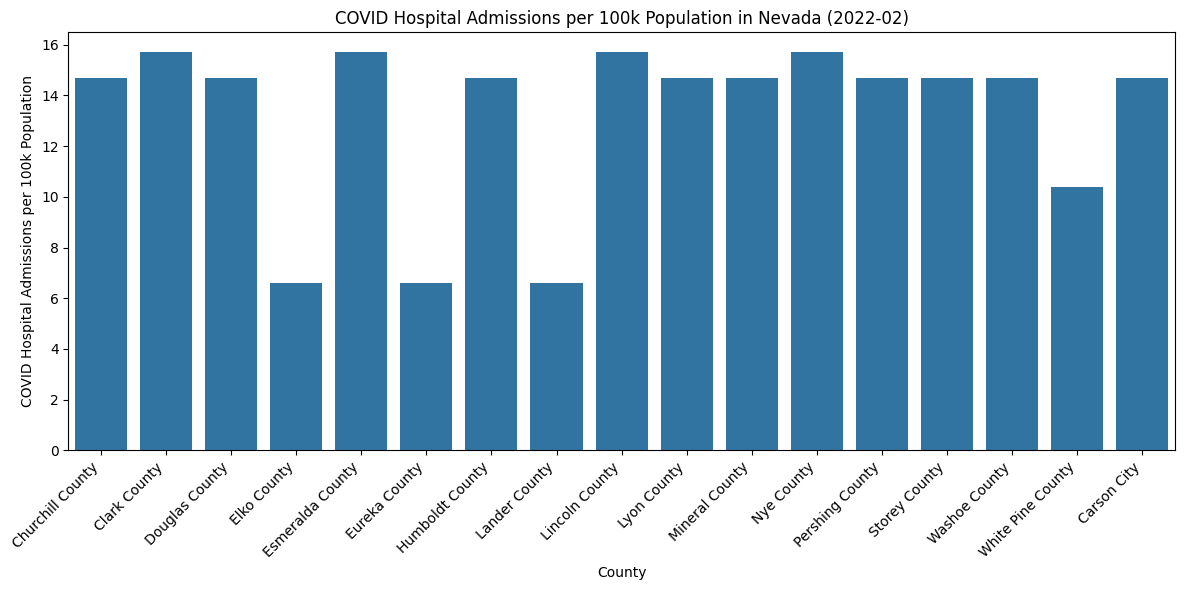

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


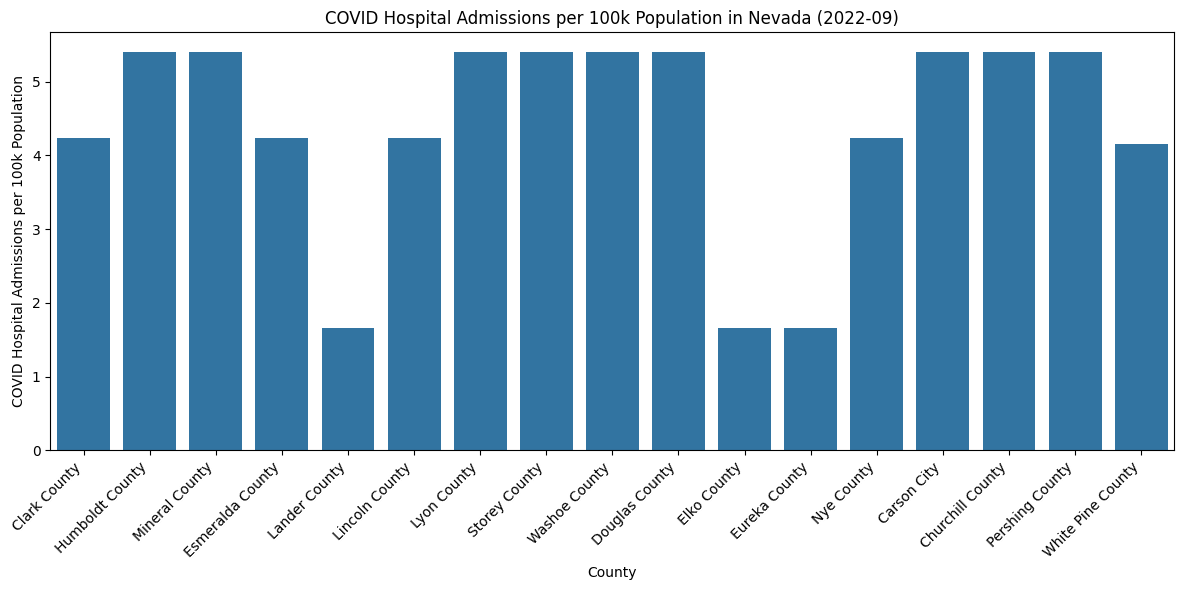

<ipython-input-21-e24e2f1607a8>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)


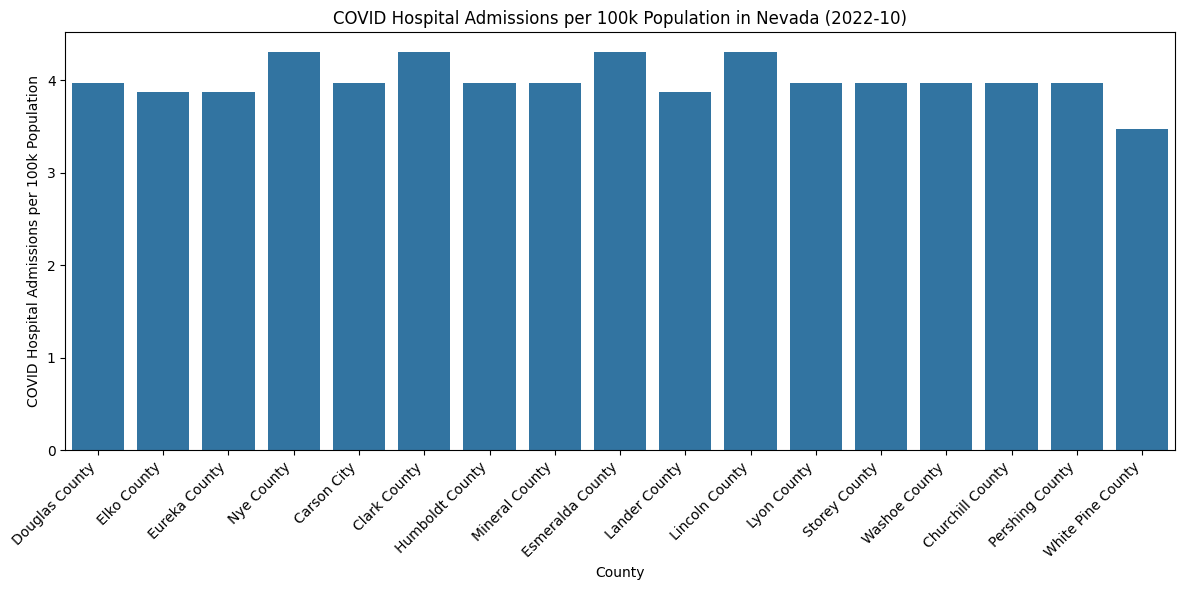

In [21]:
# Iterate over each unique month
for month in unique_months:
    # Filter data for the current month
    df_month = df_nv[df_nv['date_updated'].dt.to_period('M') == month]

    # Plot bar chart for current month
    plt.figure(figsize=(12, 6))
    sns.barplot(x='county', y='covid_hospital_admissions_per_100k', data=df_month, ci=None)
    plt.title(f'COVID Hospital Admissions per 100k Population in Nevada ({month})')
    plt.xlabel('County')
    plt.ylabel('COVID Hospital Admissions per 100k Population')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
